# Partial Differential Equations and Gaussian Process with GPy

#### presented at the EBI BioPreDyn Course 'The Systems Biology Modelling Cycle'

#### Mu Niu, Neil Lawrence, 12th May 20014, University of Sheffield

## The Spatio-Temporal Model

In this notebook we consider the latent force model paradigm (<a href="http://ieeexplore.ieee.org/xpl/articleDetails.jsp?arnumber=6514873">Alvarez et al, 2013</a>, <a href="http://arxiv.org/abs/1107.2699">Alvarez et al, 2011</a>, <a href="http://jmlr.org/proceedings/papers/v5/alvarez09a/alvarez09a.pdf">Alvarez et al, 2009</a>) to drive spatio-temporal differential equation with a Gaussian process. Latent force models are differential equations whose initial conditions or driving forces are given by a stochastic process. Linear latent force models are linear (partial or ordinary) differential equations. If a linear latent force model is driven by a Gaussian process latent force, this describes a joint Gaussian process distribution across all the variables of interest. The Gaussian process covariance function encodes the relationships between the variables, as proscribed by the differential equation, through the covariance function. 

This direction of research is part of our ideas as to how to merge mechanistic and statistical models of data. It also maps onto our ideas about 'Gaussian processes over everything'. The covariance function interelates the protein and mRNA concentrations in the same model.

### Differential Equation Model

A model of post-transcriptional processing is formulated to describe the spatio-temporal Drosophila
protein expression data (<a href="http://www.ploscompbiol.org/article/info%3Adoi%2F10.1371%2Fjournal.pcbi.1003281">Becker et al, 2013</a>, <a href="http://arxiv.org/abs/1107.2699">Alvarez et al, 2011</a>). Protein production is considered to be linearly dependent on the concentration of mRNA at an earlier time point. The model also allows for diffusion of protein between nuclei and linear protein decay. These processes are dependent on the diffusion parameter and the degradation rate of protein respectively.

\begin{equation}
 a \frac{\partial ^2 y_{x,t}}{\partial x^2} + b \frac{\partial y_{x,t}}{\partial t} + c y_{x,t}=  f_{x,t} 
\end{equation}

The coefficients $a$, $b$ and $c$ are unknown. In this study, we use Gaussian process with an exponentiated quadratic kernel as a prior over $y_{x,t}$ (protein). The kernel of $f_{x,t}$ (mRNA) is derived by applying the partial differential operator on the spatial-temporal kernel of protein. The multi-output Gaussian process are developed by combining the covariance matrix of mRNA and protein and their cross covariance.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import pylab as pb
import GPy
import pandas
from pandas import read_csv

The spatio-temporal multi-output partial differential equation covariance functions have been developed with the kernel name `GPy.kern.ODE_st` in GPy. The inputs are one dimension spatial data, one dimension temporal data and one dimension index which is used to indicate $f$ and $y$.

### 

In [2]:
data = GPy.util.datasets.drosophila_knirps()

The next thing to do is to compose the data ready for presentation to GPy. Here we need to use the time field as the input and a concatanation of the expression levels as the output. We need to provide a corresponding index for to each input to describe what output is being represented.

Now we set up the covariance function with the relevant parameters.

In [3]:
kern = GPy.kern.ODE_st(input_dim=3,
                       a=1., b=1., c=1.,
                       variance_Yx=1., variance_Yt=1.,
                       lengthscale_Yx=15.,
                       lengthscale_Yt=15.) 

With the data correctly presented and the covariance function defined, we are ready to proceed with the Gaussian process regression.

In [4]:
data['X']
data['Y']

array([[  5.90000000e-01],
       [  5.00000000e-01],
       [  9.00000000e-02],
       [  2.50000000e-01],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  8.00000000e-02],
       [  2.30000000e-01],
       [  0.00000000e+00],
       [  1.90000000e-01],
       [  0.00000000e+00],
       [  2.70000000e-01],
       [  1.40000000e-01],
       [  1.00000000e-01],
       [  2.70000000e-01],
       [  8.20000000e-01],
       [  2.04000000e+00],
       [  2.01000000e+00],
       [  3.19000000e+00],
       [  4.74000000e+00],
       [  8.47000000e+00],
       [  9.74000000e+00],
       [  1.44700000e+01],
       [  2.02400000e+01],
       [  2.74100000e+01],
       [  3.54200000e+01],
       [  4.33400000e+01],
       [  5.29000000e+01],
       [  6.03400000e+01],
       [  6.57900000e+01],
       [  7.28200000e+01],
       [  7.45700000e+01],
       [  7.55900000e+01],
       [  7.54700000e+01],
       [  7.48900000e+01],
       [  7.24400000e+01],
 

In [5]:
m = GPy.models.GPRegression(data['X'],data['Y'],kern) 

# Initial Fit

The initial value of $a$, $b$ and $c$ are 1. For these choices of covariance function parameters, we can plot the random field of $f$ and $y$ separately.


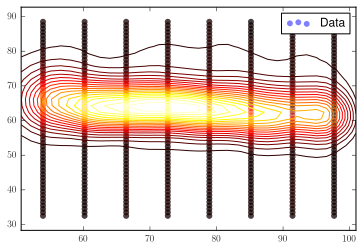

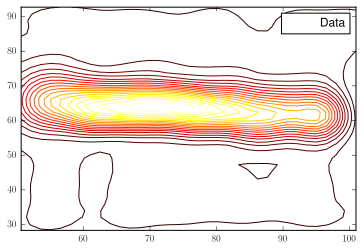

In [6]:
leng = data['X'].shape[0]
m.plot(fixed_inputs=[(2,0)], which_data_rows = slice(0,leng*2/2))
m.plot(fixed_inputs=[(2,1)], which_data_rows = slice(leng*2/2,leng*2))

Now we optimize the model, this will take a few minutes.

In [7]:
m.optimize(messages=True)

After optimization, the estimated value of $a$, $b$ and $c$ can be printed.


In [8]:
print m


Name : GP regression
Objective : 2746.1527561
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  GP_regression.           |           value  |  constraints  |  priors
  ode_st.a                 |  0.439572373353  |      +ve      |        
  ode_st.b                 |   10.0570722172  |      +ve      |        
  ode_st.c                 |  0.620499976794  |      +ve      |        
  ode_st.variance_Yt       |   32.8822754879  |      +ve      |        
  ode_st.variance_Yx       |   32.8822754879  |      +ve      |        
  ode_st.lengthscale_Yt    |   18.3834609145  |      +ve      |        
  ode_st.lengthscale_Yx    |    14.356693167  |      +ve      |        
  Gaussian_noise.variance  |   3.26945467609  |      +ve      |        


The plot of the random fields are plotted below. 


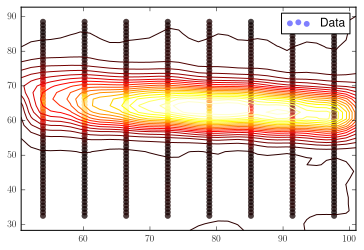

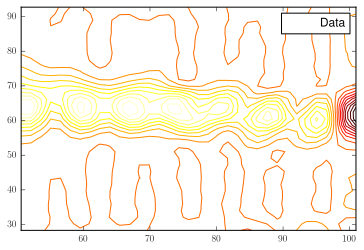

In [9]:
m.plot(fixed_inputs=[(2,0)], which_data_rows = slice(0,leng*2/2))
pb.savefig("gene.pdf")
GPy.plotting.show(m.plot(fixed_inputs=[(2,1)], which_data_rows = slice(leng*2/2,leng*2)), filename='test')
pb.savefig("protein.pdf")

In his diploma thesis Kolja Becker estimated the parameters of the partial differential equation where $a = 0.159$, $b =12.77$ and $c =0.983$. The results from the GP approach is $a =0.439$, $b= 10.06$ and $c=0.62$. The GP results are different but they are still within the range of the confidence interval defined in Becker's paper. Two further issues may lead to the difference. One reason could be that the original partial differential equation had a delay parameter $\tau$ for the mRNA ($f$). In our GP model, we did not include this parameter. However, since the Protein-mRNA partial differential equation is linear and Becker's estimate of $\tau$ is small comparing with the time step of the data. The delay impact should not be too big. The estimation algorithm used in Becker's thesis is based on least squares optimization.  The GP approach considers protein and mRNA as a nonlinear function of space and time. And treat the PDE as a linear function to link them. The different modelling methods could also lead to different estimation of the parameters.

Finally, we didn't perform a sensitivity analysis in the above notebook. One thing we can do next is to run a Hamiltonian Monte-Carlo sampler on the model to form error bars for our own analysis. It may be that they are not very well determined given the data.

#### work funded by the BioPreDyn project, it is a collaboration with Nicolas Durrande, Johannes Jaeger.